# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Load data

In [2]:
# Load the data files into different DataFrames
display(df_calls)
display(df_internet)
display(df_messages)
display(df_plans)
display(df_users)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


0

## Prepare the data

Currently have 5 seperate data frames that are specific to individual factors of the customers usage. From looking over the information breifly we can see there are some NaN values in the user data. Message, calls, user data and internet all have some duplicated information. Will be looking further into the data provided with the goal of merging all data plans together, studying the overall revenue based off the plan details provided and testing some hypothesis at the end of the project.

## Plans

In [44]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()
df_plans.describe()
df_plans.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


0

In [46]:
# Print a sample of data for plans 
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


0

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Would appear that the data allotted is slightly over the standard of 15GB and 30GB which would incure an additional charge for each plan of $10 (surf) and $7 (ultimate).

## Fix data

df requires no corrections as everything seems to align with the specifications regarding cost and allotment of data, minuets and talk time. All column names are in lower case with _ used for space and both plans labeled correctly

## Enrich data

df requires no enrichment as everything seems to align with the specifications given in the project overview.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
df_users.info()
df_users.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [6]:
# Print a sample of data for users
df_users.sample(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
23,1023,Jack,Delaney,70,"Omaha-Council Bluffs, NE-IA MSA",2018-07-06,surf,NaN
437,1437,Louis,Neal,42,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-12,surf,NaN
26,1026,Meggan,Hamilton,49,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-20,ultimate,NaN
284,1284,Yuri,Odom,51,"Dayton-Kettering, OH MSA",2018-09-07,surf,NaN
267,1267,Gia,Parker,53,"St. Louis, MO-IL MSA",2018-03-12,surf,NaN
86,1086,Adena,Macias,36,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-13,ultimate,NaN
128,1128,Lucius,Fernandez,41,"Knoxville, TN MSA",2018-01-25,ultimate,NaN
228,1228,Jude,Hale,26,"Detroit-Warren-Dearborn, MI MSA",2018-04-15,surf,NaN
189,1189,Terrence,Smith,75,"Columbus, OH MSA",2018-09-24,surf,NaN
456,1456,Seymour,Olsen,66,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-02,ultimate,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Based on the sampled data we can see that most plans are still currently active based on the churn date being NaN and more often than not they are on the surf plan

### Fix Data

In [7]:
# Count missing values in churn_date
missing_churn = df_users['churn_date'].isna().sum()
print(f"Number of users still active: {missing_churn}")

# If desired, you can create a new column indicating active users
df_users['is_active'] = df_users['churn_date'].isna()
df_users

Number of users still active: 466


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,True
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN,True
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN,True
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,True


In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,True
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,True
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,True
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,True


In [9]:
df_users.duplicated().sum()

0

### Enrich Data

Additional column added in to show current active users. Changed reg_date and churn_date to datetime values. No further action needed for this df.

## Calls

In [48]:
# Print the general/summary information about the calls' DataFrame
df_calls.info()
display(df_calls)
df_calls.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
 4   month      137735 non-null  period[M]     
dtypes: datetime64[ns](1), float64(1), int64(1), object(1), period[M](1)
memory usage: 5.3+ MB


,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,2018-12
1,1000_145,1000,2018-12-27,14.0,2018-12
2,1000_247,1000,2018-12-27,15.0,2018-12
3,1000_309,1000,2018-12-28,6.0,2018-12
4,1000_380,1000,2018-12-30,5.0,2018-12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0,2018-11
137731,1499_200,1499,2018-10-20,11.0,2018-10
137732,1499_201,1499,2018-09-21,9.0,2018-09
137733,1499_202,1499,2018-10-10,1.0,2018-10


0

In [11]:
# Print a sample of data for calls
df_calls.sample(10)


,id,user_id,call_date,duration
1785,1009_207,1009,2018-11-16,0.00
87964,1324_5,1324,2018-08-01,4.10
94903,1336_840,1336,2018-06-06,14.46
116216,1406_442,1406,2018-11-29,4.26
22836,1082_1001,1082,2018-09-23,6.60
121091,1424_109,1424,2018-12-31,6.83
84508,1312_0,1312,2018-10-10,11.30
127017,1454_7,1454,2018-08-07,14.97
19393,1073_232,1073,2018-07-29,9.37
23290,1085_82,1085,2018-11-07,1.02


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

df appears to have missing information in regards to call duration as some calls appear to have a 0.00 duration. Based off parameters of the project these calls would have no impact on total min allotment as they were >0.01

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [12]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [13]:
# Find entries with negative duration
negative_durations = df_calls['duration'] < 0

# Count or review them
print(f"Number of negative duration entries: {negative_durations.sum()}")

# df_calls = df_calls[~negative_durations]

# Check if cleaning is done
print("Cleaning complete. Any negative durations left:", (df_calls['duration'] < 0).any())

Number of negative duration entries: 0
Cleaning complete. Any negative durations left: False


In [14]:
import numpy as np 
df_calls.duration = np.ceil(df_calls.duration)

In [15]:
df_calls.head(2)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0


### Enrich data

Changed call_date to datetime dtype. Checked for negative call durations, total number is zero. No further corrections needed for this df.

## Messages

In [49]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()
df_messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33243 entries, 0 to 76045
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            33243 non-null  object        
 1   user_id       33243 non-null  int64         
 2   message_date  33243 non-null  datetime64[ns]
 3   month         33243 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(1), period[M](1)
memory usage: 1.3+ MB


0

In [17]:
# Print a sample of data for messages
df_messages.sample(10)


,id,user_id,message_date
6770,1057_94,1057,2018-10-23
63952,1408_77,1408,2018-04-13
36631,1244_63,1244,2018-11-07
50871,1331_46,1331,2018-12-02
12089,1080_92,1080,2018-09-01
10851,1077_122,1077,2018-04-16
66721,1434_255,1434,2018-09-14
11366,1077_637,1077,2018-11-08
12371,1081_121,1081,2018-09-13
75913,1494_151,1494,2018-07-25


### Fix data

In [18]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [19]:
# Check for duplicates in the 'id' column
duplicate_ids = df_messages.duplicated(subset='id').sum()
print(f"Number of duplicate message IDs: {duplicate_ids}")

# Option 1: Drop duplicates based on 'id'
df_messages = df_messages.drop_duplicates(subset='id')

# Option 2: If you suspect aggregation is needed, you might inspect other columns as well
# For instance, you could check duplicates across 'user_id' and 'message_date' for unusual repetition:
duplicate_entries = df_messages.duplicated(subset=['user_id', 'message_date']).sum()
print(f"Number of duplicate message entries: {duplicate_entries}")

# If required, drop those as well
df_messages = df_messages.drop_duplicates(subset=['user_id', 'message_date'])

# Check
print("Duplicates handling complete. Any duplicates left:", df_messages.duplicated(subset='id').any())

Number of duplicate message IDs: 0
Number of duplicate message entries: 42808
Duplicates handling complete. Any duplicates left: False


### Enrich data

## Internet

In [47]:
# Print the general/summary information about the internet DataFrame
df_internet.info()
df_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   gb_used       91078 non-null  float64       
 5   month         91078 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), period[M](1)
memory usage: 4.9+ MB


0

In [21]:
# Print a sample of data for the internet traffic
df_internet.sample(10)


,id,user_id,session_date,mb_used
55590,1251_401,1251,2018-05-28,520.91
40895,1183_86,1183,2018-12-06,375.10
28688,1132_54,1132,2018-08-20,687.74
64285,1295_147,1295,2018-10-18,403.25
56098,1253_162,1253,2018-10-07,430.82
54111,1246_12,1246,2018-02-26,671.77
19390,1088_94,1088,2018-12-31,336.21
7201,1041_41,1041,2018-11-27,0.00
41769,1185_806,1185,2018-02-03,641.01
5415,1030_14,1030,2018-10-29,532.41


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Appears that the df contains missing information in regards to mb_used for certain sessions. 

### Fix data

In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')


Number of entries with non-positive MB usage: 13747
count    91078.000000
mean       422.064206
std        255.063501
min          0.010000
25%        223.380000
50%        395.905000
75%        588.367500
max       1693.470000
Name: mb_used, dtype: float64
Number of potential outliers (above 1097.8791999999999 MB): 911


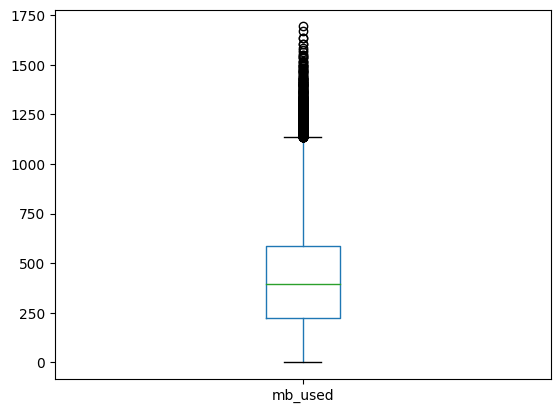

In [23]:
# Check for non-negative and zero values
negative_or_zero_mb = (df_internet['mb_used'] <= 0).sum()
print(f"Number of entries with non-positive MB usage: {negative_or_zero_mb}")

# Option 1: Remove rows with non-positive MB usage, if they are errors
df_internet = df_internet[df_internet['mb_used'] > 0]

# Check for unusually high values
# First, get some statistics to understand typical usage
print(df_internet['mb_used'].describe())

# Option 2: Define a sensible upper limit based on your domain knowledge or statistical analysis
# For example, consider anything above the 99th percentile as potential outliers
upper_limit = df_internet['mb_used'].quantile(0.99)
outliers = (df_internet['mb_used'] > upper_limit).sum()
print(f"Number of potential outliers (above {upper_limit} MB): {outliers}")

# Decide on a strategy: investigate, cap, or review these outliers

# Another check: Plotting could help visualize distributions
import matplotlib.pyplot as plt
df_internet['mb_used'].plot(kind='box')
plt.show()

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [24]:
df_internet["gb_used"] = np.ceil(df_internet.mb_used / 1024)
df_internet.head(2)

,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,1.0
2,1000_379,1000,2018-12-28,660.40,1.0


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

Description of the plans
Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

Surf

Monthly charge: 20.00 usd

500 monthly minutes, 50 texts, and 15 GB of data

After exceeding the package limits:
1 minute: 3 cents
1 text message: 3 cents
1 GB of data: 10.00 usd

Ultimate

Monthly charge: 70.00 usd

3000 monthly minutes, 1000 text messages, and 30 GB of data

After exceeding the package limits:
1 minute: 1 cent
1 text message: 1 cent
1 GB of data: 7.00 usd

## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [25]:
# Convert call_date, message_date, and session_date to datetime if not already
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Extract month and year for grouping
df_calls['month'] = df_calls['call_date'].dt.to_period('M')
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
df_internet['month'] = df_internet['session_date'].dt.to_period('M')

# Aggregate data
calls_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()



In [26]:
# Calculate the number of calls
calls_per_user = df_calls.groupby(['user_id', 'month']).count()
calls_per_user

id  call_date  duration
user_id month                           
1000    2018-12  16         16        16
1001    2018-08  27         27        27
        2018-09  49         49        49
        2018-10  65         65        65
        2018-11  64         64        64
...              ..        ...       ...
1498    2018-12  39         39        39
1499    2018-09  41         41        41
        2018-10  53         53        53
        2018-11  45         45        45
        2018-12  65         65        65

[2258 rows x 3 columns]

In [27]:
# Calculate the total minutes
minutes_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_user

,user_id,month,duration
0,1000,2018-12,124.0
1,1001,2018-08,182.0
2,1001,2018-09,315.0
3,1001,2018-10,393.0
4,1001,2018-11,426.0
...,...,...,...
2253,1498,2018-12,339.0
2254,1499,2018-09,346.0
2255,1499,2018-10,385.0
2256,1499,2018-11,308.0


In [28]:
# Calculate the total messages
messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()

# Rename columns for clarity
messages_per_user.rename(columns={'id': 'messages_count'}, inplace=True)

messages_per_user

,user_id,month,messages_count
0,1000,2018-12,7
1,1001,2018-08,14
2,1001,2018-09,23
3,1001,2018-10,25
4,1001,2018-11,19
...,...,...,...
1801,1496,2018-09,17
1802,1496,2018-10,14
1803,1496,2018-11,10
1804,1496,2018-12,10


In [29]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user

,user_id,month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-08,6919.15
2,1001,2018-09,13314.82
3,1001,2018-10,22330.49
4,1001,2018-11,18504.30
...,...,...,...
2272,1498,2018-12,23137.69
2273,1499,2018-09,12984.76
2274,1499,2018-10,19492.43
2275,1499,2018-11,16813.83


In [30]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# Merge calls and messages data
merged_data = pd.merge(calls_per_user, messages_per_user, on=['user_id', 'month'], how='outer')

# Merge the result with internet data
merged_data = pd.merge(merged_data, internet_per_user, on=['user_id', 'month'], how='outer')

# Merge the result with minutes data
merged_data = pd.merge(merged_data, minutes_per_user, on=['user_id', 'month'], how='outer')

# Display the merged data
display(merged_data.head())


,user_id,month,id,call_date,duration_x,messages_count,mb_used,duration_y
0,1000,2018-12,16.0,16.0,16.0,7.0,1901.47,124.0
1,1001,2018-08,27.0,27.0,27.0,14.0,6919.15,182.0
2,1001,2018-09,49.0,49.0,49.0,23.0,13314.82,315.0
3,1001,2018-10,65.0,65.0,65.0,25.0,22330.49,393.0
4,1001,2018-11,64.0,64.0,64.0,19.0,18504.30,426.0


In [31]:
# Add the plan information

# Merge with user plan information
final_data = pd.merge(merged_data, df_users[['user_id', 'plan', 'city']], on='user_id', how='left')

# If there's another DataFrame with plan details, add it to get plan specifics
# Assuming df_plans contains details about the plans (plan name, monthly limits, etc.)
final_data = pd.merge(final_data, df_plans, left_on='plan', right_on='plan_name', how='left')

# Display the final data with the plan information
print(final_data.head())


   user_id    month    id  call_date  duration_x  messages_count   mb_used  \
0     1000  2018-12  16.0       16.0        16.0             7.0   1901.47   
1     1001  2018-08  27.0       27.0        27.0            14.0   6919.15   
2     1001  2018-09  49.0       49.0        49.0            23.0  13314.82   
3     1001  2018-10  65.0       65.0        65.0            25.0  22330.49   
4     1001  2018-11  64.0       64.0        64.0            19.0  18504.30   

   duration_y      plan                                   city  \
0       124.0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA   
1       182.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
2       315.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
3       393.0      surf        Seattle-Tacoma-Bellevue, WA MSA   
4       426.0      surf        Seattle-Tacoma-Bellevue, WA MSA   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1   

In [32]:
# Calculate the monthly revenue for each user
# Define a function to calculate monthly revenue
def calculate_revenue(row):
    # Define the plan details
    plans = {
        'surf': {
            'monthly_fee': 20,
            'minutes_included': 500,
            'texts_included': 50,
            'data_included_gb': 15,
            'extra_minute_cost': 0.03,
            'extra_text_cost': 0.03,
            'extra_gb_cost': 10
        },
        'ultimate': {
            'monthly_fee': 70,
            'minutes_included': 3000,
            'texts_included': 1000,
            'data_included_gb': 30,
            'extra_minute_cost': 0.01,
            'extra_text_cost': 0.01,
            'extra_gb_cost': 7
        }
    }
    
    # Get the user's plan details
    plan = plans[row['plan']]
    
    # Calculate excess usage
    extra_minutes = max(0, row['duration_x'] - plan['minutes_included'])
    extra_texts = max(0, row['messages_count'] - plan['texts_included'])
    extra_data_gb = max(0, (row['mb_used'] / 1024) - plan['data_included_gb'])

    # Calculate charges
    extra_minute_charge = extra_minutes * plan['extra_minute_cost']
    extra_text_charge = extra_texts * plan['extra_text_cost']
    extra_data_charge = extra_data_gb * plan['extra_gb_cost']

    # Total revenue
    total_revenue = plan['monthly_fee'] + extra_minute_charge + extra_text_charge + extra_data_charge
    
    return total_revenue

# Apply the function to calculate revenue for each user
final_data['monthly_revenue'] = final_data.apply(calculate_revenue, axis=1)

# Display the final DataFrame with calculated revenue
print(final_data[['user_id', 'month', 'monthly_revenue']].head())

   user_id    month  monthly_revenue
0     1000  2018-12        70.000000
1     1001  2018-08        20.000000
2     1001  2018-09        20.000000
3     1001  2018-10        88.071191
4     1001  2018-11        50.706055


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [33]:
final_data.head(5)

,user_id,month,id,call_date,duration_x,messages_count,mb_used,duration_y,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,2018-12,16.0,16.0,16.0,7.0,1901.47,124.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,2018-08,27.0,27.0,27.0,14.0,6919.15,182.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,2018-09,49.0,49.0,49.0,23.0,13314.82,315.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,2018-10,65.0,65.0,65.0,25.0,22330.49,393.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,88.071191
4,1001,2018-11,64.0,64.0,64.0,19.0,18504.30,426.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,50.706055


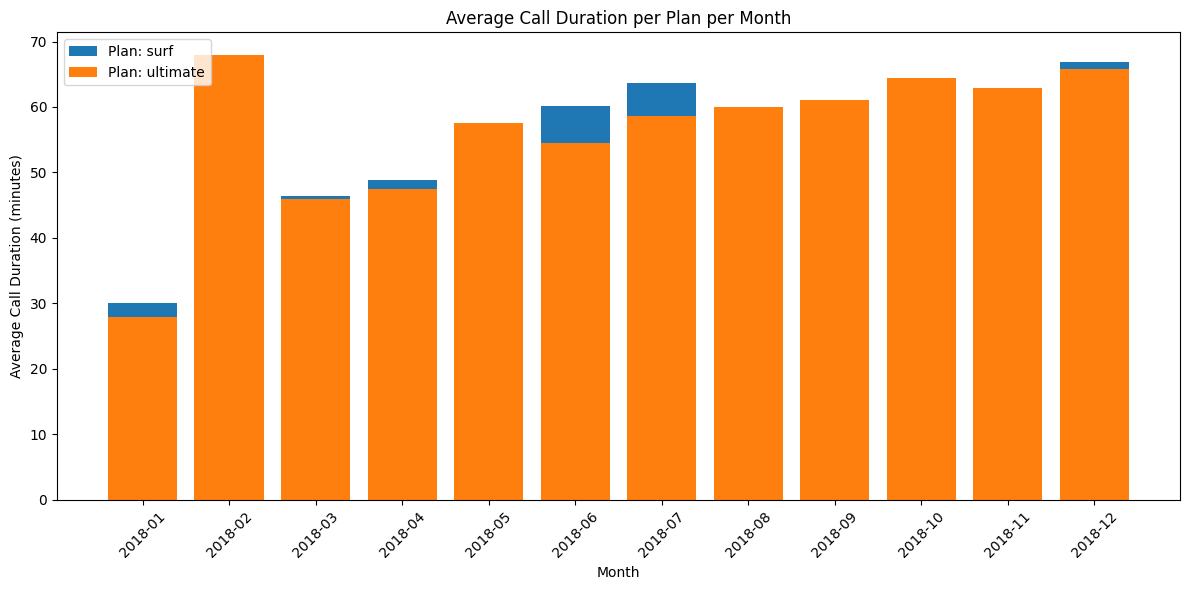

In [34]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
import matplotlib.pyplot as plt

# Ensure 'final_data' has necessary columns and correct data types
final_data['month'] = final_data['month'].astype(str)  # Ensure 'month' is a string for plotting

# Group by 'plan' and 'month' and calculate the average call duration
avg_duration_per_plan = final_data.groupby(['plan', 'month'])['duration_x'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for plan in avg_duration_per_plan['plan'].unique():
    plan_data = avg_duration_per_plan[avg_duration_per_plan['plan'] == plan]
    plt.bar(plan_data['month'], plan_data['duration_x'], label=f"Plan: {plan}")

plt.xlabel('Month')
plt.ylabel('Average Call Duration (minutes)')
plt.title('Average Call Duration per Plan per Month')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Mean and Variance of Call Duration by Plan:
       plan       mean          var
0      surf  60.895793   977.690559
1  ultimate  61.221599  1079.470488


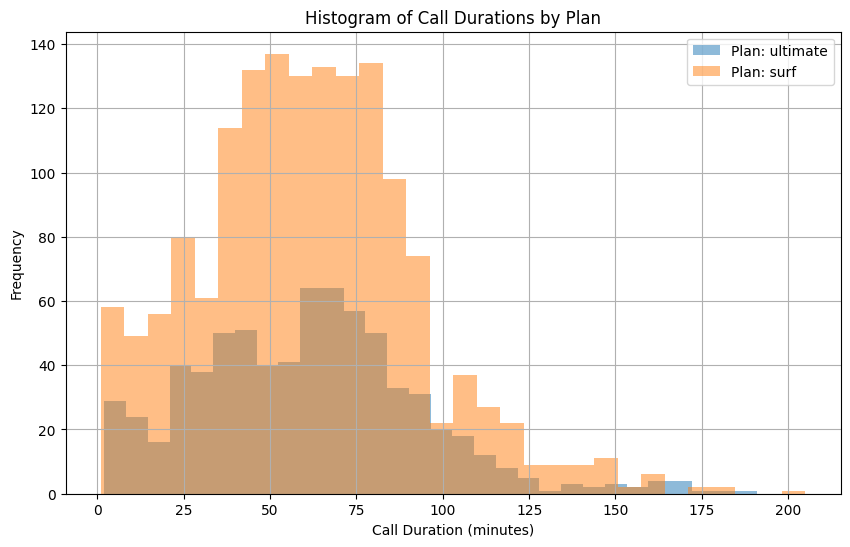

In [35]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.


# Calculate mean and variance of call duration grouped by plan
call_stats = final_data.groupby('plan')['duration_x'].agg(['mean', 'var']).reset_index()
print("Mean and Variance of Call Duration by Plan:")
print(call_stats)

# Plot histograms of call durations for each plan
plt.figure(figsize=(10, 6))
for plan in final_data['plan'].unique():
    subset = final_data[final_data['plan'] == plan]['duration_x'].dropna()
    plt.hist(subset, bins=30, alpha=0.5, label=f"Plan: {plan}")

plt.title("Histogram of Call Durations by Plan")
plt.xlabel("Call Duration (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


In [36]:
# Calculate the mean and the variance of the monthly call duration

# Group data by user and month, then sum the call durations for each group
monthly_call_durations = final_data.groupby(['user_id', 'month'])['duration_x'].sum()

# Calculate the overall mean and variance of the monthly call durations
mean_monthly_duration = monthly_call_durations.mean()
var_monthly_duration = monthly_call_durations.var()

print(f"Mean of monthly call duration: {mean_monthly_duration:.2f} minutes")
print(f"Variance of monthly call duration: {var_monthly_duration:.2f} minutes²")


Mean of monthly call duration: 60.07 minutes
Variance of monthly call duration: 1049.93 minutes²


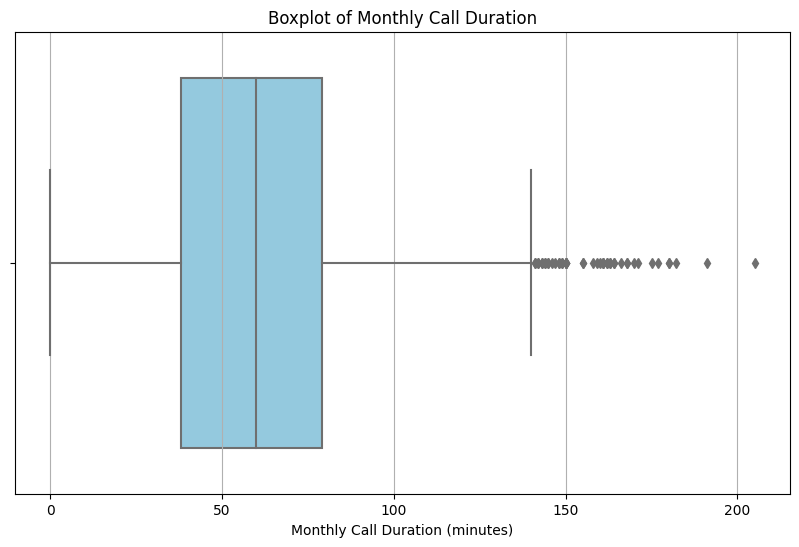

In [37]:
# Plot a boxplot to visualize the distribution of the monthly call duration
import seaborn as sns
# Aggregate monthly call durations for each user
monthly_call_duration = final_data.groupby(['user_id', 'month'])['duration_x'].sum().reset_index()

# Plot a boxplot for the monthly call durations
plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_call_duration['duration_x'], orient='h', color='skyblue')

plt.title("Boxplot of Monthly Call Duration")
plt.xlabel("Monthly Call Duration (minutes)")
plt.grid(axis='x')
plt.show()


Based on the data provided here, it would appear that the surf users have a similar call duration time as ultimate users with ultimate users having a slightly higher overall variance. The average call time for users on both plans is about 60 mins per call.

### Messages

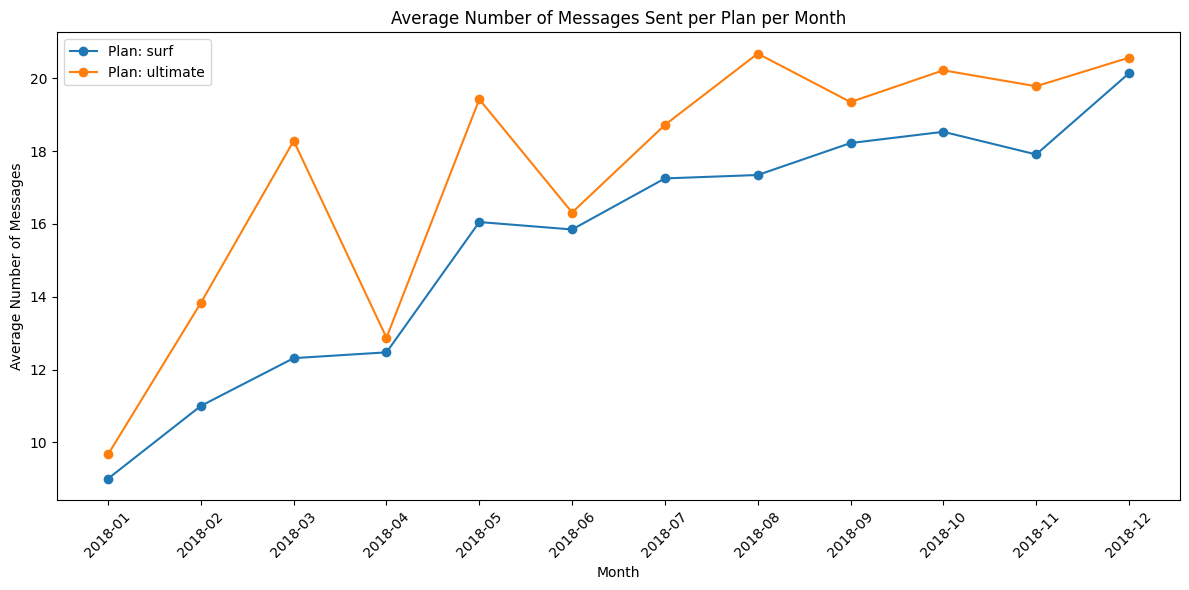

In [38]:
# Compare the number of messages users of each plan tend to send each month

import matplotlib.pyplot as plt

# Ensure 'final_data' has necessary columns and correct data types
final_data['month'] = final_data['month'].astype(str)  # Ensure 'month' is a string for plotting

# Group by 'plan' and 'month' and calculate the total number of messages
messages_per_plan = final_data.groupby(['plan', 'month'])['messages_count'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
for plan in messages_per_plan['plan'].unique():
    plan_data = messages_per_plan[messages_per_plan['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['messages_count'], marker='o', label=f"Plan: {plan}")

plt.xlabel('Month')
plt.ylabel('Average Number of Messages')
plt.title('Average Number of Messages Sent per Plan per Month')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on this chart we can observe a higher message rate from users on the ultimate plan. We have two outlier months were the average messages per plan per user are almost identical (April and June).

### Internet

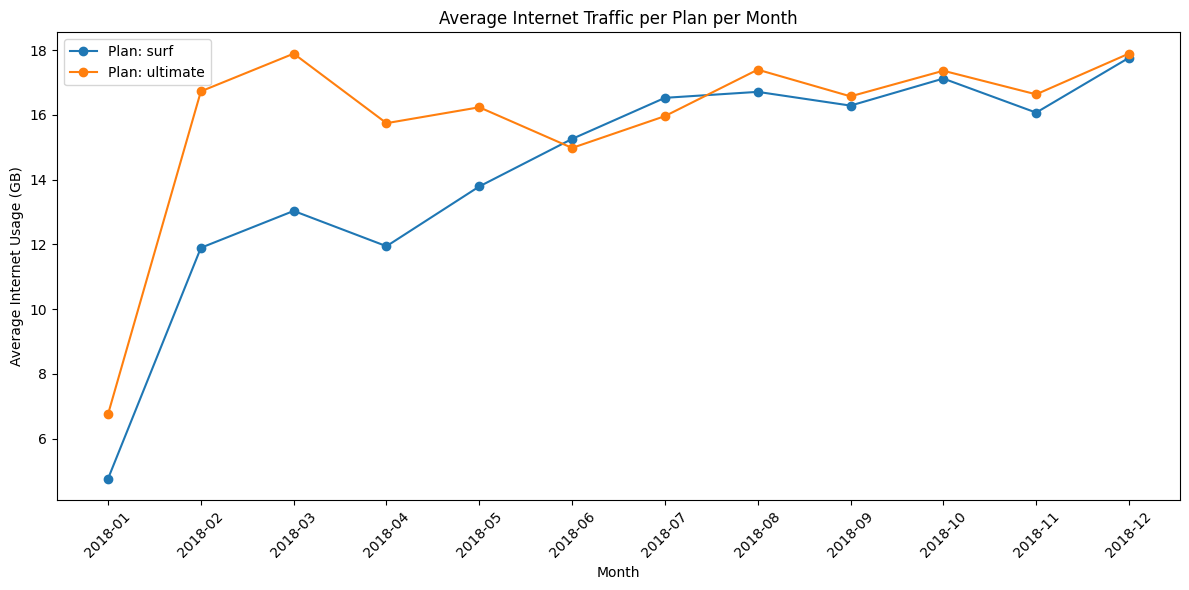

In [40]:
import matplotlib.pyplot as plt

# Ensure the 'month' is in the right format for plotting
final_data['month'] = final_data['month'].astype(str)

# Group by 'plan' and 'month' and calculate the average internet usage in GB
internet_usage_per_plan = final_data.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
internet_usage_per_plan['gb_used'] = internet_usage_per_plan['mb_used'] / 1024  # Convert MB to GB

# Plotting
plt.figure(figsize=(12, 6))
for plan in internet_usage_per_plan['plan'].unique():
    plan_data = internet_usage_per_plan[internet_usage_per_plan['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['gb_used'], marker='o', label=f"Plan: {plan}")

plt.xlabel('Month')
plt.ylabel('Average Internet Usage (GB)')
plt.title('Average Internet Traffic per Plan per Month')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Looking at the graph provided we can see that ultimate users have a higher rate of useage than those on surf. July is the only month recorded where surf users have a higher useage than those on ultimate. Months Januart-May we can see a significant differnce in useage while June-December are nearly identical.

## Revenue

       plan       mean    median        std
0      surf  55.618695  34.34873  52.926412
1  ultimate  72.116080  70.00000  10.768848


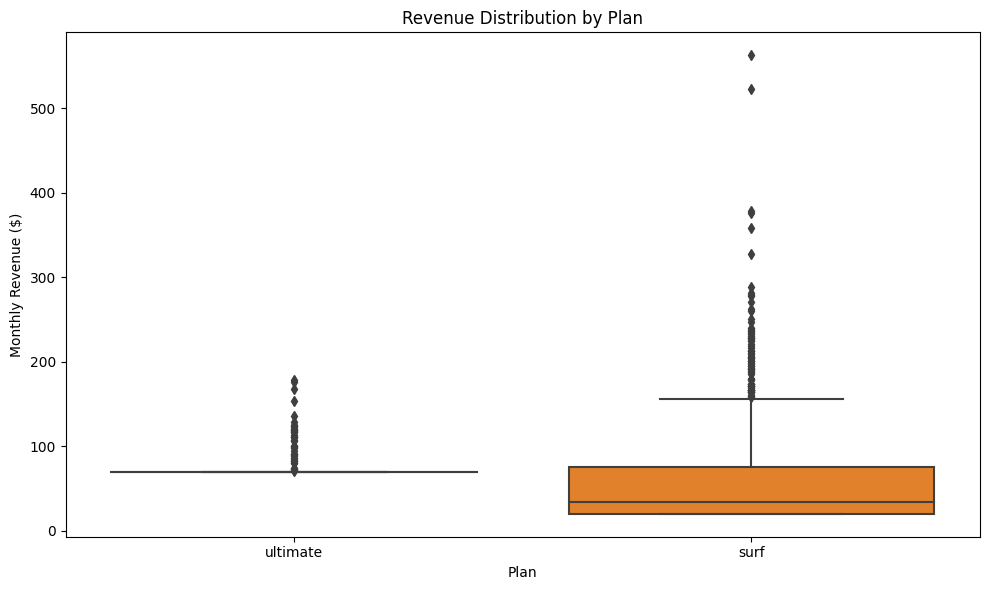

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


# Compute summary statistics
revenue_stats = final_data.groupby('plan')['monthly_revenue'].agg(['mean', 'median', 'std']).reset_index()
print(revenue_stats)

# Visualize revenue distribution with box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_data, x='plan', y='monthly_revenue')
plt.title('Revenue Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue ($)')
plt.tight_layout()
plt.show()


Based on the provided **mean** and **variance** of call durations for the two plans (`surf` and `ultimate`), we can draw the following conclusions about user behavior:

---

### Key Observations:
1. **Mean Call Duration**:
   - The mean call duration for both plans is almost identical:
     - **Surf**: ~60.90 minutes
     - **Ultimate**: ~61.22 minutes
   - This indicates that, on average, users of both plans spend a similar amount of time on calls each month.

2. **Variance of Call Duration**:
   - The variance is slightly higher for the **Ultimate** plan (1079.47 minutes²) compared to the **Surf** plan (977.69 minutes²).
   - This suggests that users on the Ultimate plan exhibit **slightly more variability** in their call durations. Some users might make significantly shorter or longer calls compared to the mean.

---

### Conclusions:
1. **Similarity in Average Usage**:
   - Users on both plans behave similarly in terms of their average calling habits. The small difference in mean duration (~0.3 minutes) is negligible and does not suggest a significant behavioral difference between the plans.

2. **Slight Difference in Variability**:
   - The higher variance for the Ultimate plan indicates a broader range of calling behaviors. This could mean:
     - Some Ultimate plan users take advantage of the plan's features (e.g., more included minutes, better rates) to make very long calls.
     - Alternatively, others may make very short calls, causing greater dispersion in call durations.

3. **Impact of Plan Features**:
   - While the means are similar, the difference in variance might reflect the flexibility or constraints of the plans:
     - **Surf Plan**: Slightly lower variance suggests more uniform usage patterns, possibly due to tighter restrictions or less flexibility in the plan.
     - **Ultimate Plan**: Slightly higher variance might indicate that users on this plan include both heavy and light callers, possibly due to the plan catering to a wider range of needs (e.g., unlimited minutes or better rates for longer calls).

---

### Final Insights:
- **Behavior is largely consistent across plans**, with nearly identical average call durations.
- The Ultimate plan shows **more diverse user behavior**, likely catering to both light and heavy callers, while Surf users are more uniform in their calling habits.

Would you like to dive deeper into specific aspects, such as outlier analysis or monthly trends?

## Test statistical hypotheses

- H0: hypothesis that the average of the revenue in the surface plan population equals the average of the revenue in the ultimate plan population
- H1: hypothesis that the average of the revenue in the surface plan population does not equal the average of the revenue in the ultimate plan population


In [42]:
# Test the hypotheses
from scipy.stats import ttest_ind

# Remove any NaN values
surf_revenue = final_data[final_data['plan_name'] == 'surf']['monthly_revenue'].dropna()
ultimate_revenue = final_data[final_data['plan_name'] == 'ultimate']['monthly_revenue'].dropna()

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(surf_revenue, ultimate_revenue, equal_var=False)

# Interpret the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.01:
    print("Reject the null hypothesis. There is a significant difference in average revenue between the two plans.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average revenue between the two plans.")


T-statistic: -11.838724588147505, P-value: 3.2556834061110747e-31
Reject the null hypothesis. There is a significant difference in average revenue between the two plans.


In [50]:
# Test the hypotheses

revenue_stats = final_data

from scipy.stats import ttest_ind

# Filter the data by region
ny_nj_revenue = revenue_stats[revenue_stats['city'].str.contains('NY|NJ', na=False)]['monthly_revenue'].dropna()
other_revenue = revenue_stats[~revenue_stats['city'].str.contains('NY|NJ', na=False)]['monthly_revenue'].dropna()

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)

# Interpret the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in average revenue between NY-NJ users and other regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average revenue between NY-NJ users and other regions.")


T-statistic: -1.689257078930394, P-value: 0.09156791285454728
Fail to reject the null hypothesis. There is no significant difference in average revenue between NY-NJ users and other regions.


## General conclusion

The company generates revenue primarily from two plans: Surf and Ultimate.

Surf Plan:

The average (mean) revenue per customer is approximately $55.62, with a median of $34.35.
This suggests a significant variation in revenue among customers, as indicated by the relatively high standard deviation of $52.93. The large gap between the mean and median could imply the presence of some high-revenue customers that skew the average upward.
Ultimate Plan:

The average (mean) revenue per customer is $72.12, and the median is $70.00.
The relatively low standard deviation of $10.77 indicates more consistent revenue across customers, with less variation compared to the Surf Plan.

Overall, the Ultimate Plan appears to provide more stable and predictable revenue, while the Surf Plan offers more variability and potentially greater risk but may attract a broader range of customers. Depending on the company’s goals, this data can guide decisions on pricing strategies, marketing efforts, or resource allocation for each plan.